## 1. Problem Definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 

This is because we're going to be using a number of differnet **features** (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?


## 2. Data
The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

### Heart Disease Data Dictionary

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve


In [2]:
df = pd.read_csv("data\\heart-disease.csv")
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

> **EDA (Exploratory Data Analysis):** Compare different columns to each other, compare them to the target variable. Refer back to your data dictionary and remind yourself of what different columns mean.

Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:

1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

If you'd prefer these values in percentages, `value_counts()` takes a parameter, `normalize` which can be set to true

In [4]:
df["target"].value_counts(normalize=True)*100

1    54.455446
0    45.544554
Name: target, dtype: float64

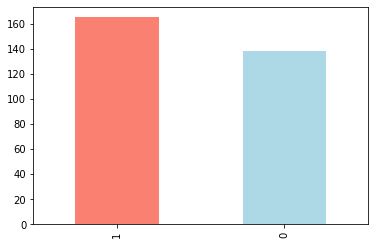

In [5]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [8]:
pd.crosstab(df.sex, df.target)

target    0   1
sex            
0        24  72
1       114  93

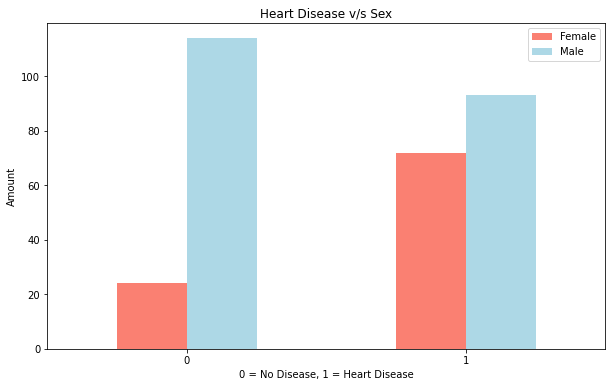

In [9]:
pd.crosstab(df.target, df.sex).plot(kind="bar", color=["salmon", "lightblue"], figsize=(10,6))
plt.title("Heart Disease v/s Sex")
plt.xlabel("0 = No Disease, 1 = Heart Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [10]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

the `length=91` shows that there are lot of different unique values (91 different types of values) so it is not possible to plot it in bar graph.

In [11]:
# age information of Male patiest having heart disease
df.age[(df.target==1) & (df.sex==1)]

0      63
1      37
3      56
5      57
7      44
       ..
159    56
160    56
162    41
163    38
164    38
Name: age, Length: 93, dtype: int64

### Age vs Max Heart rate for Heart Disease

Let's try combining a couple of independent variables, such as, `age` and `thalach` (maximum heart rate) and then comparing them to our target variable `heart disease`.

Because there are so many different values for `age` and `thalach`, we'll use a scatter plot.

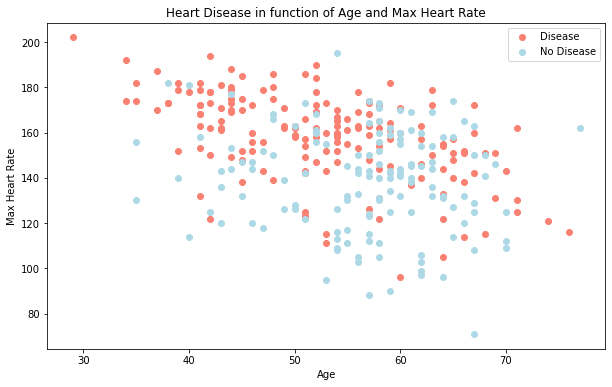

In [12]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

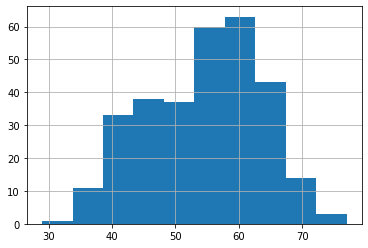

In [13]:
df.age.hist();

### Heart Disease Frequency per Chest Pain Type
- cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
            

In [14]:
pd.crosstab(df.cp, df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

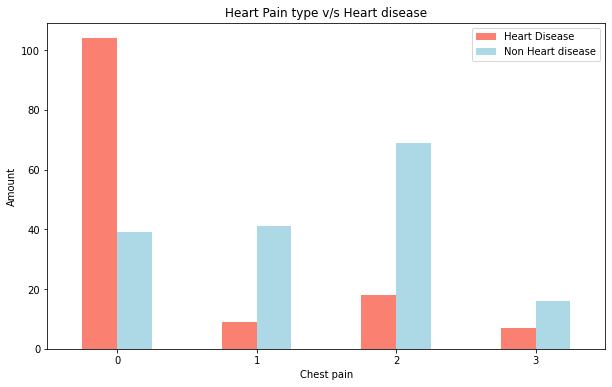

In [15]:
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  color=["salmon", "lightblue"],
                                  figsize=(10,6))

plt.title("Heart Pain type v/s Heart disease")
plt.xlabel("Chest pain")
plt.ylabel("Amount")
plt.legend(["Heart Disease", "Non Heart disease"])
plt.xticks(rotation=0);

### Correlation Matrix
Its shows  how each independent variables are related to the dependent one or the target variable.
There can be (-)ve correlation or (+)ve correlation

In [16]:
corr_matrix = df.corr()
corr_matrix

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

**Heat Map using the Correlation Matrix**
- We can see that diagonally the values are 1 (which means the same column is equal to the same one like age = age)
- there positive and negative correlation matrix
> **Positive Correlation :** For example of cp to target... this means as cp value goes up the risk of having the Heart Disease also goes up
> **Negative Correlation :** For example exang to traget... the relationship between two variables as when other decreases the other increases. in the xample when thalach value goes down the risk of heart disease also goes up.

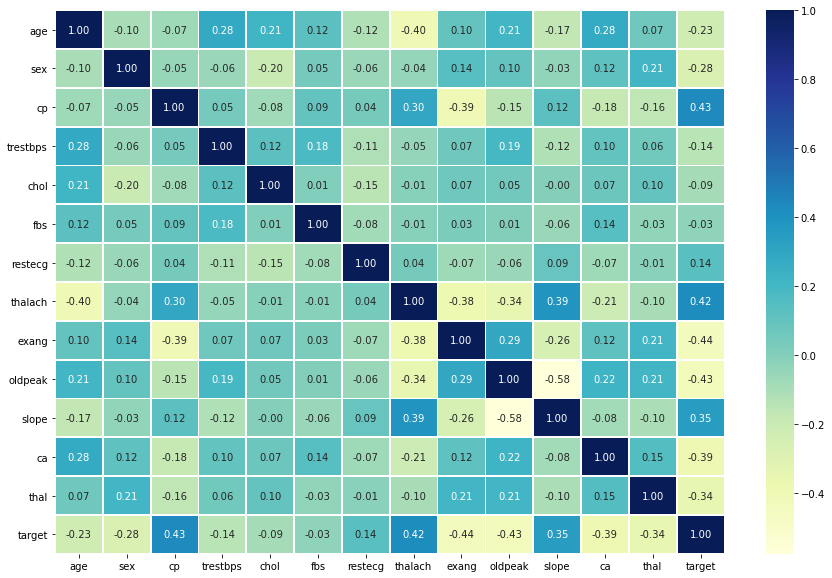

In [17]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidth=0.8,
           fmt=".2f",
           cmap="YlGnBu");

## Building the model.

In [18]:
X = df.drop("target", axis=1)
y = df["target"]

In [19]:
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2

In [20]:
np.random.seed(55)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(242, 61, 242, 61)

##### We are creating a common function to create the model trained  and test too .

In [21]:
# Putting the different types of models to be build in the Dictionary
model_types = {"KNN": KNeighborsClassifier(),
         "Logistic Regression": LogisticRegression(),
         "Random Forest": RandomForestClassifier()}

# We will create a function where we will fit and score the models from the dictionary
# The different models should be tested with the same verion of the spliteed train and test data not on different versions
# That is the reason that split of the train test data should be done outside the function

def train_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    model_types : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    np.random.seed(55)
    
    # creating a dictionary to store model scrores
    model_scores_dict = {}
    
    # loop through different models in the dictionary to fit and scrore them
    for name, model in  models.items():
        model.fit(X_train, y_train)
        #scoring the model and saving it in the dictionary
        model_scores_dict[name] = model.score(X_test, y_test)
    return model_scores_dict

In [22]:
model_scores = train_and_score(models=model_types,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7377049180327869,
 'Logistic Regression': 0.8360655737704918,
 'Random Forest': 0.8032786885245902}

## Model Comparison and Hyperparameter Tunning

* **Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.
* **Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age or cp?
* [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average. 
* [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.
* [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) - Combines precision and recall into one metric. 1 is best, 0 is worst.
* [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Sklearn has a built-in function called `classification_report()` which returns some of the main classification metrics such as precision, recall and f1-score.
* [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html) - [Receiver Operating Characterisitc](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a plot of true positive rate versus false positive rate.
* [**Area Under Curve (AUC)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

### Hyperparameter Tunning using For loop

In [23]:
train_scores = []
test_scores = []

np.random.seed(55)
# creating a list of n_neighbors from a range of 1 to 21
neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))


The Maximum score is:73.77%


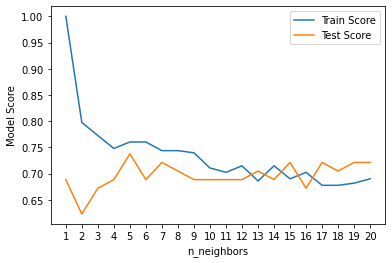

In [24]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("n_neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"The Maximum score is:{max(test_scores)*100:.2f}%")

### Tuning models with with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)


In [25]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


In [26]:
np.random.seed(55)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# fitting the model with the hyperparameters tunned in
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


In [27]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [28]:
rs_log_reg.score(X_test, y_test)

0.8032786885245902

In [29]:
np.random.seed(55)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

rs_rf.fit(X_train, y_train);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished


In [30]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 8,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [31]:
rs_rf.score(X_test, y_test)

0.8360655737704918

### Tuning a model with [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [32]:
log_reg_grid = {"C": np.logspace(-4, 4, 10),
               "penalty": ["l1", "l2", "elasticnet", "none"],
               "dual": [True, False],
               "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\model_se

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 445, in _check_solver
    raise ValueError("Solver %s supports only "
ValueError: Solver sag supports only dual=False, got dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters w

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this

A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the docu

A:\ML\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
A:\ML\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
A:\ML\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
A:\ML\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
A:\ML\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
A:\ML\env\lib\s

A:\ML\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
A:\ML\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\ML\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter wa

A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the docu

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "A:\ML\env\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "A:\ML\env\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s, '
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=Tru

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this t

A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\ML\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
A:\ML\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
A:\ML\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter wa

A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Incre

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 445, in _check_solver
    raise ValueError("Solver %s supports only "
ValueError: Solver sag supports only dual=False, got dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters w

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ di

A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on 

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

A:\ML\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproces

A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on 

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 445, in _check_solver
    raise ValueError("Solver %s supports only "
ValueError: Solver sag supports only dual=False, got dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters w

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ di

A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on 

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 445, in _check_solver
    raise ValueError("Solver %s supports only "
ValueError: Solver saga supports only dual=False, got dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters 

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ di

A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

A:\ML\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 pe

A:\ML\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 445, in _check_solver
    raise ValueError("Solver %s supports only "
ValueError: Solver sag supports only dual=False, got dual=True

  warnings.warn("Estimator fit failed. The sc

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ di

A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1356, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "A:\ML\env\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "A:\ML\env\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s, '
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=Tru

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The s

A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:

A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on 

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 445, in _check_solver
    raise ValueError("Solver %s supports only "
ValueError: Solver saga supports only dual=False, got dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters 

A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "A:\ML\env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
A:\ML\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ di

A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

A:\ML\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   24.0s finished
A:\ML\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
gs_log_reg.best_params_

{'C': 0.3593813663804626, 'dual': False, 'penalty': 'l2', 'solver': 'lbfgs'}

In [38]:
gs_log_reg.score(X_test, y_test)

0.8360655737704918

In [35]:
model_scores

{'KNN': 0.7377049180327869,
 'Logistic Regression': 0.8360655737704918,
 'Random Forest': 0.8032786885245902}

## Evaluating a classification model, beyond accuracy

Now we've got a tuned model, let's get some of the metrics we discussed before.

We want:
* ROC curve and AUC score - [`plot_roc_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)
* Confusion matrix - [`confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* Classification report - [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* Precision - [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall - [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1-score - [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

**Making the predictions first**

In [40]:
y_preds = gs_log_reg.predict(X_test)

### ROC Curve and AUC Scores

What's a ROC curve?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

In our case...

> To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.

Scikit-Learn implements a function `plot_roc_curve` which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

Reading the documentation on the [`plot_roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html) function we can see it takes `(estimator, X, y)` as inputs. Where `estiamator` is a fitted machine learning model and `X` and `y` are the data you'd like to test it on.

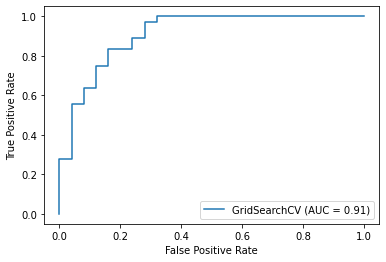

In [41]:
plot_roc_curve(gs_log_reg, X_test, y_test)

### Confusion matrix 
A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

In [50]:
print(confusion_matrix(y_test, y_preds))

[[18  7]
 [ 3 33]]


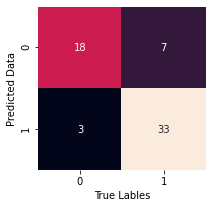

In [47]:
import seaborn as sns

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    
    plt.xlabel("True Lables")
    plt.ylabel("Predicted Data")

plot_conf_mat(y_test, y_preds)

In [49]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.82      0.92      0.87        36

    accuracy                           0.84        61
   macro avg       0.84      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

In [65]:
gs_log_reg.best_params_

{'C': 0.3593813663804626, 'dual': False, 'penalty': 'l2', 'solver': 'lbfgs'}

In [78]:
clf_log_reg = LogisticRegression(C=0.3593813663804626, 
                                # dual=False, 
                                # penalty='l2', 
                                 solver='liblinear')

In [81]:
# creating a function for Evaluation

metrices = {"Accuracy Score": "accuracy", 
            "Precision Score": "precision", 
            "Recall Score": "recall", 
            "F1 Score": "f1"}

scores = {}

def evaluation_matrix(model, X, y, cv, metrices):
    for label, scoring in metrices.items():
        cv_score = cross_val_score(estimator=model, X=X, y=y, cv=5, scoring=scoring)  
        scores[label] = np.mean(cv_score)
    return scores

In [85]:
#cv_acc = cross_val_score(gs_log_reg, X=X, y=y, cv=5, scoring="accuracy")
evaluation_matrix(clf_log_reg, X, y, 5, metrices)
scores

{'Accuracy Score': 0.8414207650273223,
 'Precision Score': 0.8201213818860877,
 'Recall Score': 0.9151515151515153,
 'F1 Score': 0.864052334062442}

##### Converting the dictionary to DataFrame with Coulmn Headers

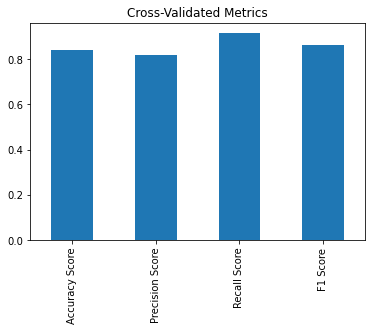

In [111]:
cv_metrics = pd.DataFrame(scores, 
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

### Model Driven EDA or Feature Importance
Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

You can usually find an example via the Scikit-Learn documentation or via searching for something like "[MODEL TYPE] feature importance", such as, "random forest feature importance"

To do so, we'll use the `coef_` attribute. Looking at the [Scikit-Learn documentation for `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), the `coef_` attribute is the coefficient of the features in the decision function.

We can access the `coef_` attribute after we've fit an instance of `LogisticRegression`.

In [116]:
clf_log_reg.fit(X_train, y_train)
clf_log_reg.coef_

array([[ 0.01924849, -1.05159351,  0.71512138, -0.01721791, -0.0064902 ,
        -0.15322675,  0.32188221,  0.03274778, -0.58017974, -0.48893925,
         0.29236185, -0.61470015, -0.69905534]])

Looking at this it might not make much sense. But these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.

Even knowing this, in it's current form, this `coef_` array still doesn't mean much. But it will if we combine it with the columns (features) of our dataframe.

In [123]:
features_dict = dict(zip(df.columns, list(clf_log_reg.coef_[0])))
features_dict

{'age': 0.019248490290473444,
 'sex': -1.0515935126646931,
 'cp': 0.7151213840200725,
 'trestbps': -0.017217905522688932,
 'chol': -0.006490195205752379,
 'fbs': -0.1532267451543088,
 'restecg': 0.3218822131211752,
 'thalach': 0.03274777926627528,
 'exang': -0.5801797373970656,
 'oldpeak': -0.4889392452936224,
 'slope': 0.2923618485641499,
 'ca': -0.6147001512493866,
 'thal': -0.6990553407739613}

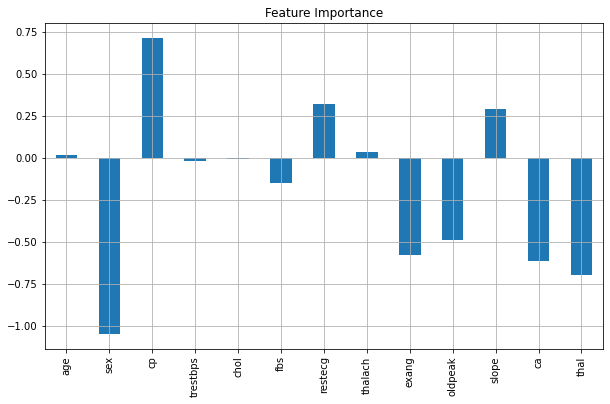

In [128]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot(kind="bar", title="Feature Importance", legend=False, figsize=(10,6), grid=True);